In [2]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer

import scipy.stats as st


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
target_column = 'SalePrice'


numerical_df = train_df.select_dtypes(include='number')
#numerical_df = numerical_df.drop(columns=['Id', target_column])
numerical_df = numerical_df.dropna(axis=1)
numerical_columns = [column for column in numerical_df.columns
                           if column
                           in test_df.dropna(axis=1).columns]
numerical_df=numerical_df[numerical_columns+[target_column]]

y=train_df[target_column]

numerical_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,856,854,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,1262,0,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,920,866,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,961,756,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,1145,1053,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,953,694,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,2073,0,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,1188,1152,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,1078,0,0,...,366,0,112,0,0,0,0,4,2010,142125


In [5]:
# split training validation dataset

RANDOM_STATE = 42
train_df, val_df  = sklearn.model_selection.train_test_split(numerical_df,
                                                            test_size= 0.2,
                                                            train_size= 0.8,
                                                            random_state= RANDOM_STATE)
train_df

# Don't forget to remove Id and target column while fitting the model!




,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
254,255,20,8400,5,6,1957,1957,1314,0,0,...,250,0,0,0,0,0,0,6,2010,145000
1066,1067,60,7837,6,7,1993,1994,799,772,0,...,0,40,0,0,0,0,0,5,2009,178000
638,639,30,8777,5,7,1910,1950,796,0,0,...,328,0,164,0,0,0,0,5,2008,85000
799,800,50,7200,5,7,1937,1950,981,787,0,...,0,0,264,0,0,0,0,6,2007,175000
380,381,50,5000,5,6,1924,1950,1026,665,0,...,0,0,242,0,0,0,0,5,2010,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,9317,6,5,2006,2006,1314,0,0,...,0,22,0,0,0,0,0,3,2007,176432
1130,1131,50,7804,4,3,1928,1950,1328,653,0,...,431,44,0,0,0,0,0,12,2009,135000
1294,1295,20,8172,5,7,1955,1990,864,0,0,...,0,0,0,0,0,0,0,4,2006,115000
860,861,50,7642,7,8,1918,1998,912,514,0,...,0,240,0,0,0,0,0,6,2007,189950


In [6]:
# Compare validation MSLE by using the log target for MLR

# MLR on target

y = train_df[target_column]
X = train_df.drop(columns = ['Id',target_column])
MLR_target = LinearRegression()
MLR_target.fit(X,y)


# MLR on log(target)
MLR_log_target = LinearRegression()
log_y = np.log(y)
MLR_log_target.fit(X,log_y)

# CompareMSLE on validation data for both models

#MSLE of first model
y_val_true = val_df[target_column]
X_val = val_df.drop(columns = ['Id',target_column])
y_val_pred = MLR_target.predict(X_val)
print(mean_squared_log_error(y_true= y_val_true, y_pred= y_val_pred)) #penser à importer la fonction depuis sklearn.metrics

#MSLE for log model
log_y_val_pred = MLR_log_target.predict(X_val)
log_y_val_pred_corrected = np.exp(log_y_val_pred)
mean_squared_log_error(y_true= y_val_true, y_pred= log_y_val_pred_corrected)



0.03433574494444057


0.023768162546792652

In [7]:
# compare validation MSLE by standardizing input feature in MLR

y = train_df[target_column]
log_y = np.log(y)
X = train_df.drop(columns = ['Id',target_column])
#importer QuantileTransformer de sklearn.preprocessing
quantile_transformer = QuantileTransformer(n_quantiles=100,
                                           output_distribution='normal',
                                           random_state=RANDOM_STATE)
X_train_scaled = quantile_transformer.fit_transform(X)
MLR_scaled_target = LinearRegression()
MLR_scaled_target.fit(X_train_scaled,log_y)

y_val_true = val_df[target_column]
X_val_scaled = quantile_transformer.transform(val_df.drop(columns = ['Id',target_column]))

scaled_y_val_pred = MLR_scaled_target.predict(X_val_scaled)
scaled_y_val_pred_corrected = np.exp(scaled_y_val_pred)
mean_squared_log_error(y_true= y_val_true, y_pred= scaled_y_val_pred_corrected)


0.023363979092669827

<AxesSubplot: >

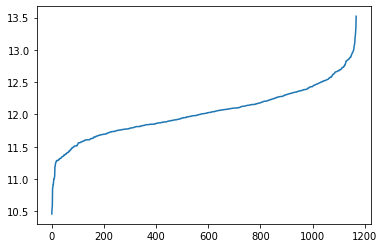

In [8]:
log_y.sort_values().reset_index()["SalePrice"].plot()

In [9]:
# compare validation MSLE by removing outliers from training dateset in MLR
log_y_max = log_y.quantile(q=0.75)+ 1.5*st.iqr(log_y)
log_y_min =  np.percentile(log_y,q=0.25) - 1.5*st.iqr(log_y)
log_y_median = np.median(log_y)

In [10]:
y.count()

1168

In [11]:
logic = (log_y >= log_y_min) & (log_y <= log_y_max)
sum(logic)

1159

In [12]:
# removing outliers
y = train_df[target_column]
log_y = np.log(y)
log_y_max = log_y.quantile(q=0.75)+ 1.5*st.iqr(log_y)
log_y_min =  np.percentile(log_y,q=0.25) - 1.5*st.iqr(log_y)
log_y_median = np.median(log_y)
X = train_df.drop(columns = ['Id',target_column])
X = X[logic]
#importer QuantileTransformer de sklearn.preprocessing
quantile_transformer = QuantileTransformer(n_quantiles=100,
                                           output_distribution='normal',
                                           random_state=RANDOM_STATE)
X_train_scaled = quantile_transformer.fit_transform(X)
MLR_scaled_target = LinearRegression()
MLR_scaled_target.fit(X_train_scaled,log_y[logic])

y_val_true = val_df[target_column]
X_val_scaled = quantile_transformer.transform(val_df.drop(columns = ['Id',target_column]))

scaled_y_val_pred = MLR_scaled_target.predict(X_val_scaled)
scaled_y_val_pred_corrected = np.exp(scaled_y_val_pred)
mean_squared_log_error(y_true= y_val_true, y_pred= scaled_y_val_pred_corrected)

0.024662312382972895

In [13]:
# Idea => remove features with high correlations

In [14]:
test = pd.read_csv("test.csv")
pred_best = MLR_scaled_target.predict(test.drop(columns = ['Id',target_column])
pred_best = pred_best.reshape(-1)
submit = pd.DataFrame({"Id": test["Id"], "SalePrice": pred_best,})
# submit.to_csv("result_v2.csv",index=False) # dataset to submit to kaggle 

NameError: name 'best_colum' is not defined

In [ ]:
# compare validation MSLE by removing highly correlated (positively or negatively) input feature in MLR

In [ ]:
# train all models seen in class MLR, Lasso, Ridge, Elastic Net, +Lars

In [ ]:
# Submit the best model in Kaggle, what is your name+public score?